In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

# Подготавливаю данные

In [2]:
data = pd.read_csv( 'C:/Users/79251/Downloads/Model_precision/adult.csv' )
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [5]:
data.workclass = data.workclass.replace({'?': 'Unknown workclass'})

In [6]:
data.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [7]:
data.occupation = data.occupation.replace({'?': 'Unknown occupation'})

In [8]:
data.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [9]:
data.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [10]:
data['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [11]:
data['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [12]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [13]:
data['native-country'] = data['native-country'].replace({'?': 'Unknown native country'})

In [14]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [15]:
data.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [16]:
X = pd.get_dummies( data.loc[:, ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status','occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']] )

In [17]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown native country,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
le.fit( data['income'] )

LabelEncoder()

In [20]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [21]:
y = pd.Series( data = le.transform( data['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_lin=scaler.transform(X_train)
X_test_lin=scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """


# Обучаю модели

In [24]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(X_train_lin, y_train)

#Здесь использовала данные X c StandardScaler, т.к. алгоритм метрический

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
RF_model.fit(X_train, y_train)  

#Здесь использовала данные X без StandardScaler, т.к. алгоритм НЕ метрический

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

BG_model = BaggingClassifier(n_estimators=10, base_estimator=DecisionTreeClassifier(), n_jobs=-1)
BG_model.fit(X_train, y_train)

#Здесь использовала данные X без StandardScaler, т.к. алгоритм НЕ метрический

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

# Оцениваю качество модели разными способами

In [27]:
#кросс-валидация

from sklearn.model_selection import cross_val_score

def crossVal(model, X, Y):
    scores_train = cross_val_score(model, X, Y, cv=10)
    return scores_train.mean()

In [28]:
crossVal(LR_model, X_train_lin, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.850048599961408

In [29]:
crossVal(RF_model, X_train, y_train)

0.8493461889053489

In [30]:
crossVal(BG_model, X_train, y_train)

0.8457703754775722

In [31]:
#оцениваю качество на тестовой выборке по accuracy

def testScores (model, X, Y):
    score = model.score(X, Y)
    return score

In [32]:
testScores(LR_model, X_test_lin, y_test)

0.8568680977788807

In [33]:
testScores(RF_model, X_test, y_test)

0.8582950738305001

In [34]:
testScores(BG_model, X_test, y_test)

0.8551929519791538

# Оценка качества с помощью ROC-AUC

In [35]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

In [37]:
LR_probas = LR_model.predict_proba(X_test_lin)[:,1]
RF_probas = RF_model.predict_proba(X_test)[:,1]
BG_probas = BG_model.predict_proba(X_test)[:,1]

In [38]:
# строим первую кривую

def pr_re_tr(y, probas, plot_label=''):
    precision, recall, thresholds = precision_recall_curve(y, probas)
    if plot_label:
        plt.plot(recall, precision, label=plot_label)
        plt.xlabel('precision')
        plt.ylabel('recall')
        plt.legend(loc='upper right')
    return

In [39]:
# строим вторую кривую

def fpr_tpr(y, probas, plot_label=''):
    fpr, tpr, thresholds2 = roc_curve(y, probas)
    if plot_label:
        plt.plot(fpr, tpr, label=plot_label)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.legend(loc='lower right')
    return

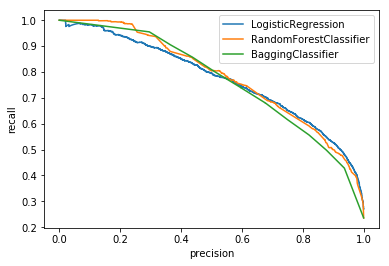

In [40]:
# а теперь хочу отобразить эти графики на одном

pr_re_tr(y_test, LR_probas, 'LogisticRegression')
pr_re_tr(y_test, RF_probas, 'RandomForestClassifier')
pr_re_tr(y_test, BG_probas, 'BaggingClassifier')
plt.show()

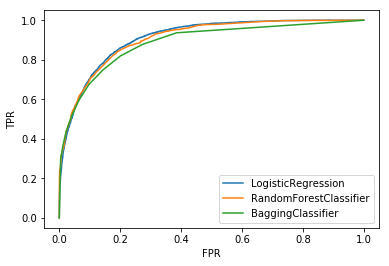

In [41]:
#для тестовой выборкки

fpr_tpr(y_test, LR_probas, 'LogisticRegression')
fpr_tpr(y_test, RF_probas, 'RandomForestClassifier')
fpr_tpr(y_test, BG_probas, 'BaggingClassifier')
plt.show()

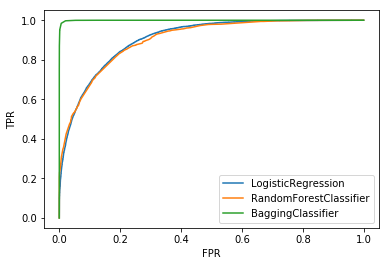

In [42]:
#хочу посмотреть, какие значения быль на train-выборке

fpr_tpr(y_train, LR_model.predict_proba(X_train_lin)[:,1], 'LogisticRegression')
fpr_tpr(y_train, RF_model.predict_proba(X_train)[:,1], 'RandomForestClassifier')
fpr_tpr(y_train, BG_model.predict_proba(X_train)[:,1], 'BaggingClassifier')
plt.show()

In [44]:
#у Bagging на основе деревьев решений на тренировочной выборке значения были гораздо выше

In [45]:
#выводим roc_auc_score и average_precision_score

def mainScores(y_test, probas):
    return roc_auc_score(y_test, probas), average_precision_score(y_test, probas)

In [46]:
mainScores(y_test, LR_probas)

(0.9110263948018675, 0.7733799672328361)

In [47]:
mainScores(y_test, RF_probas)

(0.907355334169688, 0.7759287318223239)

In [48]:
mainScores(y_test, BG_probas)

(0.8862689617044004, 0.737012957038149)

In [46]:
#самые высокие результаты оказались у логистической регрессии

# Практическое задание, которое не успели сделать на лекции и оно ушло в домашнюю

In [49]:
import pandas as pd
from sklearn.datasets import load_digits

In [50]:
data = load_digits()

In [51]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [52]:
# описание данных
for line in data['DESCR'].split('\n'):
    print( line )

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [53]:
# закодированные признаки

X = pd.DataFrame( data['data'] )
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [54]:
# целевая переменная - цифра от 0 до 9

Y = pd.Series( data['target'] )
Y.head()

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [55]:
Y.tail()

1792    9
1793    0
1794    8
1795    9
1796    8
dtype: int32

In [56]:
Ydummy = pd.get_dummies( Y )
Ydummy.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Ydummy, test_size = 0.3, random_state = 0 )

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
depths = np.arange(1,21)

grid = {'max_depth': depths}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)

In [65]:
%%time
gridsearch.fit(X_train, Y_train)

Wall time: 1.89 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [66]:
sorted(zip(gridsearch.cv_results_['mean_test_score'], gridsearch.cv_results_['params']), key = lambda x: -x[0])

[(0.843277645186953, {'max_depth': 12}),
 (0.8400954653937948, {'max_depth': 16}),
 (0.837708830548926, {'max_depth': 20}),
 (0.8361177406523469, {'max_depth': 13}),
 (0.8353221957040573, {'max_depth': 14}),
 (0.8345266507557677, {'max_depth': 15}),
 (0.8329355608591885, {'max_depth': 19}),
 (0.8313444709626094, {'max_depth': 17}),
 (0.8305489260143198, {'max_depth': 18}),
 (0.8289578361177407, {'max_depth': 11}),
 (0.8217979315831344, {'max_depth': 10}),
 (0.7971360381861575, {'max_depth': 9}),
 (0.7859984089101034, {'max_depth': 8}),
 (0.7692919649960223, {'max_depth': 7}),
 (0.6762132060461417, {'max_depth': 6}),
 (0.5576770087509945, {'max_depth': 5}),
 (0.43516308671439935, {'max_depth': 4}),
 (0.324582338902148, {'max_depth': 3}),
 (0.14001591089896578, {'max_depth': 2}),
 (0.1026252983293556, {'max_depth': 1})]

In [67]:
# лучший результат на тестовой выборке был у 'max_depth': 12

In [68]:
#Теперь посмотреим, какой результат получится на тестовой выборке

clf_final = DecisionTreeClassifier(max_depth=12)

In [69]:
clf_final.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
score = clf_final.score(X_test, Y_test)

In [71]:
score

0.8518518518518519

In [72]:
#примерно похоже на качество на train-выборке